# Clustering NBA Centers
The purpose of this notebook is identify the play style of each player inside the traditional basketball positions. We
will the KMeans clustering algorithm.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
players_data = pd.read_csv('PlayersAdvStats.csv')

centers_data = players_data[players_data['position'] == 'C']
del centers_data['position']
del centers_data['team_id']
centers_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
3,201143,Al,Horford,1891.209,15.395,6.558,6.605,13.163,0.953,2.953,...,0.534452,0.128975,0.072438,8.164184,18.443503,3.859859,8.700696,16.168654,1.275811,21.969218
4,201168,Tiago,Splitter,962.667,5.400,2.233,2.267,4.500,0.000,0.067,...,0.496296,0.251852,0.000000,9.679658,13.100544,1.868078,12.793673,8.590826,1.850683,16.237981
17,203482,Kelly,Olynyk,1270.488,9.829,3.756,4.537,8.293,1.341,3.073,...,0.533824,0.179412,0.161765,5.878822,17.617075,2.570968,11.995010,11.870783,2.242840,20.854167
24,202389,Timofey,Mozgov,1075.528,6.444,2.639,2.500,5.139,0.028,0.167,...,0.516216,0.286486,0.005405,9.398559,18.501105,3.702153,14.734774,3.589544,0.838535,17.777549
25,202684,Tristan,Thompson,1621.667,7.231,2.821,2.154,4.974,0.000,0.000,...,0.567010,0.541237,0.000000,13.388787,25.842007,1.295133,9.426848,3.957484,0.667364,11.813656
28,201582,Alexis,Ajinca,743.455,4.970,2.212,2.000,4.212,0.000,0.030,...,0.525180,0.136691,0.000000,11.012699,29.328652,3.483587,10.343149,7.639234,1.165933,22.014242
30,201600,Omer,Asik,1012.771,3.400,1.171,1.200,2.371,0.000,0.000,...,0.493976,0.698795,0.000000,11.726524,27.136954,1.985613,24.386845,4.021061,0.896643,13.304817
35,203076,Anthony,Davis,2139.270,23.486,8.838,9.054,17.892,0.514,1.757,...,0.508308,0.386707,0.028701,6.564345,29.568409,5.970444,9.041379,12.545945,1.927406,35.356123
38,201149,Joakim,Noah,1287.519,4.370,1.778,2.741,4.519,0.000,0.037,...,0.393443,0.352459,0.000000,15.165160,25.581918,3.442649,23.379730,24.421729,1.264045,13.658515
48,2585,Zaza,Pachulia,1802.171,10.512,3.585,3.634,7.220,0.000,0.049,...,0.496622,0.587838,0.000000,14.435584,27.982037,1.025721,17.494907,11.374176,1.772890,18.610988


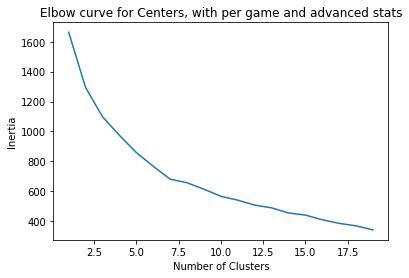

In [3]:
X_unscaled = centers_data.drop(['player_id', 'first_name', 'last_name'], 1)
scaler = StandardScaler()
scaler.fit(X_unscaled)
X = scaler.transform(X_unscaled)

cluster_number = range(1, 20)
c_kmeans_models = [KMeans(n_clusters=i) for i in cluster_number]
c_inertia = [c_kmeans_models[i].fit(X).inertia_ for i in range(len(c_kmeans_models))]
plt.plot(cluster_number, c_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Centers, with per game and advanced stats')
plt.savefig('Figures/C/kmeans-full.png')
plt.show()

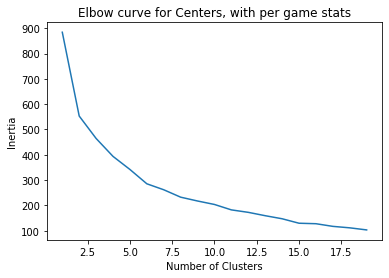

In [4]:

X_per_game_unscaled = centers_data.copy()
X_per_game_unscaled = X_per_game_unscaled.drop(['player_id', 'first_name', 'last_name', 'OffRtg', 'Floor%', 'DefRtg',
                                                'NetRtg', 'TS%', 'eFG%', 'FTARate', '3FGARate', 'OR%', 'DR%', 'BLK%',
                                                'TOV%', 'AST%', 'STL%', 'USG%'], 1)
scaler_per_game = StandardScaler()
scaler_per_game.fit(X_per_game_unscaled)
X_per_game = scaler_per_game.transform(X_per_game_unscaled)

c_kmeans_models_per_game = [KMeans(n_clusters=i) for i in cluster_number]
c_inertia_per_game = [c_kmeans_models_per_game[i].fit(X_per_game).inertia_ for i in range(len(c_kmeans_models_per_game))]
plt.plot(cluster_number, c_inertia_per_game)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Centers, with per game stats')
plt.savefig('Figures/C/kmeans-per-game.png')
plt.show()

In [3]:
X_advanced_unscaled = centers_data.copy()
X_advanced_unscaled = X_advanced_unscaled.drop(['player_id', 'first_name', 'last_name', 'played_minutes_per_game',
                                                'scored_points_per_game', 'field_goals_made_per_game',
                                                'field_goals_miss_per_game', 'field_goals_attempts_per_game',
                                                'three_points_field_goals_made_per_game',
                                                'three_points_field_goals_attempts_per_game',
                                                'free_throws_made_per_game', 'free_throws_miss_per_game',
                                                'free_throws_attempts_per_game', 'assists_per_game',
                                                'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
                                                'steals_per_game', 'blocks_per_game', 'turnovers_per_game',
                                                'personal_fouls_per_game'], 1)
scaler_advanced = StandardScaler()
scaler_advanced.fit(X_advanced_unscaled)
X_advanced = scaler_advanced.transform(X_advanced_unscaled)

c_kmeans_models_advanced = [KMeans(n_clusters=i) for i in cluster_number]
c_inertia_advanced = [c_kmeans_models_advanced[i].fit(X_advanced).inertia_ for i in range(len(c_kmeans_models_advanced))]
plt.plot(cluster_number, c_inertia_advanced)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Centers, with advanced stats')
plt.savefig('Figures/C/kmeans-advanced.png')
plt.show()

NameError: name 'cluster_number' is not defined

Analyzing the elbow curves we can conclude:
* For all statistics input the best number of clusters is 6.
* For per game statistics input the best number of clusters is 5.
* For advanced statistics input the best number of clusters is 5.

Now we build the models and compute the clusters and the analyze the cluster to evaluate which player aggrupation is
more logical.

In [20]:
# KMeans_c_full = KMeans(n_clusters=6, n_init=200).fit(X)
# joblib.dump(KMeans_c_full, 'Models/kmeans_c_full.sav')

KMeans_c_full = joblib.load('Models/kmeans_c_full.sav')

c_full_predicted_classes = KMeans_c_full.predict(X)

c_full = centers_data.copy()
c_full.insert(1, 'Cluster', c_full_predicted_classes)
c_full

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
3,201143,4,Al,Horford,1891.209,15.395,6.558,6.605,13.163,0.953,...,0.534452,0.128975,0.072438,8.164184,18.443503,3.859859,8.700696,16.168654,1.275811,21.969218
4,201168,2,Tiago,Splitter,962.667,5.400,2.233,2.267,4.500,0.000,...,0.496296,0.251852,0.000000,9.679658,13.100544,1.868078,12.793673,8.590826,1.850683,16.237981
17,203482,4,Kelly,Olynyk,1270.488,9.829,3.756,4.537,8.293,1.341,...,0.533824,0.179412,0.161765,5.878822,17.617075,2.570968,11.995010,11.870783,2.242840,20.854167
24,202389,2,Timofey,Mozgov,1075.528,6.444,2.639,2.500,5.139,0.028,...,0.516216,0.286486,0.005405,9.398559,18.501105,3.702153,14.734774,3.589544,0.838535,17.777549
25,202684,3,Tristan,Thompson,1621.667,7.231,2.821,2.154,4.974,0.000,...,0.567010,0.541237,0.000000,13.388787,25.842007,1.295133,9.426848,3.957484,0.667364,11.813656
28,201582,2,Alexis,Ajinca,743.455,4.970,2.212,2.000,4.212,0.000,...,0.525180,0.136691,0.000000,11.012699,29.328652,3.483587,10.343149,7.639234,1.165933,22.014242
30,201600,2,Omer,Asik,1012.771,3.400,1.171,1.200,2.371,0.000,...,0.493976,0.698795,0.000000,11.726524,27.136954,1.985613,24.386845,4.021061,0.896643,13.304817
35,203076,5,Anthony,Davis,2139.270,23.486,8.838,9.054,17.892,0.514,...,0.508308,0.386707,0.028701,6.564345,29.568409,5.970444,9.041379,12.545945,1.927406,35.356123
38,201149,2,Joakim,Noah,1287.519,4.370,1.778,2.741,4.519,0.000,...,0.393443,0.352459,0.000000,15.165160,25.581918,3.442649,23.379730,24.421729,1.264045,13.658515
48,2585,1,Zaza,Pachulia,1802.171,10.512,3.585,3.634,7.220,0.000,...,0.496622,0.587838,0.000000,14.435584,27.982037,1.025721,17.494907,11.374176,1.772890,18.610988


In [21]:
c_full_cluster_size = pd.DataFrame()
c_full_cluster_size['Cluster'] = [0, 1, 2, 3, 4, 5]
c_full_cluster_size['Players'] = c_full.groupby('Cluster').size()
c_full_cluster_size

,Cluster,Players
0,0,5
1,1,12
2,2,17
3,3,11
4,4,5
5,5,2


In [40]:
# KMeans_c_per_game = KMeans(n_clusters=5, n_init=200).fit(X_per_game)
# joblib.dump(KMeans_c_full, 'Models/kmeans_c_per_game.sav')

KMeans_c_per_game = joblib.load('Models/kmeans_c_per_game.sav')

c_per_game_predicted_classes = KMeans_c_per_game.predict(X_per_game)

c_per_game = centers_data.copy()
c_per_game.insert(1, 'Cluster', c_per_game_predicted_classes)
c_per_game

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
3,201143,1,Al,Horford,1891.209,15.395,6.558,6.605,13.163,0.953,...,0.534452,0.128975,0.072438,8.164184,18.443503,3.859859,8.700696,16.168654,1.275811,21.969218
4,201168,2,Tiago,Splitter,962.667,5.400,2.233,2.267,4.500,0.000,...,0.496296,0.251852,0.000000,9.679658,13.100544,1.868078,12.793673,8.590826,1.850683,16.237981
17,203482,1,Kelly,Olynyk,1270.488,9.829,3.756,4.537,8.293,1.341,...,0.533824,0.179412,0.161765,5.878822,17.617075,2.570968,11.995010,11.870783,2.242840,20.854167
24,202389,2,Timofey,Mozgov,1075.528,6.444,2.639,2.500,5.139,0.028,...,0.516216,0.286486,0.005405,9.398559,18.501105,3.702153,14.734774,3.589544,0.838535,17.777549
25,202684,2,Tristan,Thompson,1621.667,7.231,2.821,2.154,4.974,0.000,...,0.567010,0.541237,0.000000,13.388787,25.842007,1.295133,9.426848,3.957484,0.667364,11.813656
28,201582,2,Alexis,Ajinca,743.455,4.970,2.212,2.000,4.212,0.000,...,0.525180,0.136691,0.000000,11.012699,29.328652,3.483587,10.343149,7.639234,1.165933,22.014242
30,201600,2,Omer,Asik,1012.771,3.400,1.171,1.200,2.371,0.000,...,0.493976,0.698795,0.000000,11.726524,27.136954,1.985613,24.386845,4.021061,0.896643,13.304817
35,203076,4,Anthony,Davis,2139.270,23.486,8.838,9.054,17.892,0.514,...,0.508308,0.386707,0.028701,6.564345,29.568409,5.970444,9.041379,12.545945,1.927406,35.356123
38,201149,2,Joakim,Noah,1287.519,4.370,1.778,2.741,4.519,0.000,...,0.393443,0.352459,0.000000,15.165160,25.581918,3.442649,23.379730,24.421729,1.264045,13.658515
48,2585,3,Zaza,Pachulia,1802.171,10.512,3.585,3.634,7.220,0.000,...,0.496622,0.587838,0.000000,14.435584,27.982037,1.025721,17.494907,11.374176,1.772890,18.610988


In [41]:
c_per_game_cluster_size = pd.DataFrame()
c_per_game_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
c_per_game_cluster_size['Players'] = c_per_game.groupby('Cluster').size()
c_per_game_cluster_size

,Cluster,Players
0,0,5
1,1,5
2,2,27
3,3,13
4,4,2


In [56]:
# KMeans_c_advanced = KMeans(n_clusters=5, n_init=2000).fit(X_advanced)
# joblib.dump(KMeans_c_full, 'Models/kmeans_c_advanced.sav')

KMeans_c_advanced = joblib.load('Models/kmeans_c_advanced.sav')

c_advanced_predicted_classes = KMeans_c_advanced.predict(X_advanced)

c_advanced = centers_data.copy()
c_advanced.insert(1, 'Cluster', c_advanced_predicted_classes)
c_advanced

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
3,201143,2,Al,Horford,1891.209,15.395,6.558,6.605,13.163,0.953,...,0.534452,0.128975,0.072438,8.164184,18.443503,3.859859,8.700696,16.168654,1.275811,21.969218
4,201168,2,Tiago,Splitter,962.667,5.400,2.233,2.267,4.500,0.000,...,0.496296,0.251852,0.000000,9.679658,13.100544,1.868078,12.793673,8.590826,1.850683,16.237981
17,203482,4,Kelly,Olynyk,1270.488,9.829,3.756,4.537,8.293,1.341,...,0.533824,0.179412,0.161765,5.878822,17.617075,2.570968,11.995010,11.870783,2.242840,20.854167
24,202389,2,Timofey,Mozgov,1075.528,6.444,2.639,2.500,5.139,0.028,...,0.516216,0.286486,0.005405,9.398559,18.501105,3.702153,14.734774,3.589544,0.838535,17.777549
25,202684,3,Tristan,Thompson,1621.667,7.231,2.821,2.154,4.974,0.000,...,0.567010,0.541237,0.000000,13.388787,25.842007,1.295133,9.426848,3.957484,0.667364,11.813656
28,201582,2,Alexis,Ajinca,743.455,4.970,2.212,2.000,4.212,0.000,...,0.525180,0.136691,0.000000,11.012699,29.328652,3.483587,10.343149,7.639234,1.165933,22.014242
30,201600,1,Omer,Asik,1012.771,3.400,1.171,1.200,2.371,0.000,...,0.493976,0.698795,0.000000,11.726524,27.136954,1.985613,24.386845,4.021061,0.896643,13.304817
35,203076,0,Anthony,Davis,2139.270,23.486,8.838,9.054,17.892,0.514,...,0.508308,0.386707,0.028701,6.564345,29.568409,5.970444,9.041379,12.545945,1.927406,35.356123
38,201149,1,Joakim,Noah,1287.519,4.370,1.778,2.741,4.519,0.000,...,0.393443,0.352459,0.000000,15.165160,25.581918,3.442649,23.379730,24.421729,1.264045,13.658515
48,2585,1,Zaza,Pachulia,1802.171,10.512,3.585,3.634,7.220,0.000,...,0.496622,0.587838,0.000000,14.435584,27.982037,1.025721,17.494907,11.374176,1.772890,18.610988


In [57]:
c_advanced_cluster_size = pd.DataFrame()
c_advanced_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
c_advanced_cluster_size['Players'] = c_advanced.groupby('Cluster').size()
c_advanced_cluster_size

,Cluster,Players
0,0,8
1,1,9
2,2,17
3,3,14
4,4,4


#### Model fitted with all stats.

In [58]:
c_full['played_minutes_per_game'] = c_full['played_minutes_per_game'].apply(lambda sec: sec/60)

In [59]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_full_cluster0 = c_full[c_full['Cluster'] == 0]
c_full_cluster0 = c_full_cluster0.drop(['player_id'], 1)
c_full_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
77,0,Dwight,Howard,32.31,14.60,5.34,3.23,8.57,0.00,0.06,...,0.62,0.83,0.00,12.93,30.10,4.20,17.02,8.21,1.62,19.35
91,0,DeAndre,Jordan,33.83,12.29,4.53,1.60,6.13,0.00,0.00,...,0.74,1.25,0.00,12.17,31.37,5.86,10.86,4.52,0.82,14.13
110,0,Hassan,Whiteside,28.81,12.78,5.30,3.40,8.70,0.00,0.00,...,0.61,0.46,0.00,13.32,32.42,11.19,16.41,2.24,1.01,21.23
242,0,Rudy,Gobert,32.65,8.82,3.27,2.50,5.77,0.00,0.00,...,0.57,0.67,0.00,11.37,25.82,6.87,20.35,8.93,1.39,13.63
270,0,Andre,Drummond,33.69,17.57,7.38,6.59,13.98,0.02,0.07,...,0.53,0.56,0.00,16.71,35.68,3.28,10.73,4.97,2.74,26.26


In [60]:
c_full_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       32.26
scored_points_per_game                        13.21
field_goals_made_per_game                      5.16
field_goals_miss_per_game                      3.47
field_goals_attempts_per_game                  8.63
three_points_field_goals_made_per_game         0.00
three_points_field_goals_attempts_per_game     0.03
free_throws_made_per_game                      2.88
free_throws_miss_per_game                      3.21
free_throws_attempts_per_game                  6.09
assists_per_game                               1.11
offensive_rebounds_per_game                    3.78
defensive_rebounds_per_game                    8.60
steals_per_game                                0.93
blocks_per_game                                2.39
turnovers_per_game                             1.92
personal_fouls_per_game                        3.20
OffRtg                                       128.40
Floor%      

In [61]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_full_cluster1 = c_full[c_full['Cluster'] == 1]
c_full_cluster1 = c_full_cluster1.drop(['player_id'], 1)
c_full_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
48,1,Zaza,Pachulia,30.04,10.51,3.58,3.63,7.22,0.00,0.05,...,0.50,0.59,0.00,14.44,27.98,1.03,17.49,11.37,1.77,18.61
115,1,Greg,Monroe,30.17,15.98,6.56,6.23,12.79,0.00,0.00,...,0.51,0.30,0.00,12.05,27.56,2.61,10.37,16.19,1.82,27.09
131,1,Karl-Anthony,Towns,29.39,15.89,6.61,5.96,12.57,0.29,0.80,...,0.54,0.22,0.02,11.06,27.84,5.24,13.17,8.64,1.21,24.60
136,1,Brook,Lopez,33.11,19.51,7.76,8.20,15.95,0.00,0.12,...,0.49,0.32,0.00,10.15,19.12,4.94,11.20,8.87,1.21,28.28
152,1,Nikola,Vucevic,31.09,16.76,7.79,7.32,15.11,0.03,0.13,...,0.52,0.10,0.00,10.59,20.36,2.90,9.90,15.92,1.48,25.29
171,1,Nerlens,Noel,29.27,10.64,4.39,4.19,8.58,0.00,0.00,...,0.51,0.39,0.00,8.60,25.36,3.95,19.90,9.33,2.66,21.27
178,1,Jahill,Okafor,30.81,17.41,7.35,7.70,15.05,0.00,0.08,...,0.49,0.25,0.00,8.45,19.29,2.95,12.21,9.19,0.77,30.63
197,1,Mason,Plumlee,26.07,9.22,3.36,3.33,6.69,0.00,0.04,...,0.50,0.60,0.00,11.74,22.66,2.85,19.29,17.45,1.58,18.76
208,1,Tim,Duncan,25.88,9.06,3.74,3.46,7.20,0.00,0.03,...,0.52,0.29,0.00,8.77,25.97,4.06,17.89,17.83,1.91,18.68
253,1,Marc,Gasol,34.29,16.00,5.92,7.15,13.07,0.05,0.07,...,0.46,0.37,0.00,4.10,21.51,3.40,13.87,21.25,1.39,25.73


In [62]:
c_full_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       29.76
scored_points_per_game                        13.90
field_goals_made_per_game                      5.69
field_goals_miss_per_game                      5.70
field_goals_attempts_per_game                 11.39
three_points_field_goals_made_per_game         0.03
three_points_field_goals_attempts_per_game     0.11
free_throws_made_per_game                      2.49
free_throws_miss_per_game                      0.90
free_throws_attempts_per_game                  3.38
assists_per_game                               2.10
offensive_rebounds_per_game                    2.47
defensive_rebounds_per_game                    6.00
steals_per_game                                0.85
blocks_per_game                                1.19
turnovers_per_game                             1.95
personal_fouls_per_game                        2.76
OffRtg                                       114.27
Floor%      

In [63]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_full_cluster2 = c_full[c_full['Cluster'] == 2]
c_full_cluster2 = c_full_cluster2.drop(['player_id'], 1)
c_full_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
4,2,Tiago,Splitter,16.04,5.40,2.23,2.27,4.50,0.00,0.07,...,0.50,0.25,0.00,9.68,13.10,1.87,12.79,8.59,1.85,16.24
24,2,Timofey,Mozgov,17.93,6.44,2.64,2.50,5.14,0.03,0.17,...,0.52,0.29,0.01,9.40,18.50,3.70,14.73,3.59,0.84,17.78
28,2,Alexis,Ajinca,12.39,4.97,2.21,2.00,4.21,0.00,0.03,...,0.53,0.14,0.00,11.01,29.33,3.48,10.34,7.64,1.17,22.01
30,2,Omer,Asik,16.88,3.40,1.17,1.20,2.37,0.00,0.00,...,0.49,0.70,0.00,11.73,27.14,1.99,24.39,4.02,0.90,13.30
38,2,Joakim,Noah,21.46,4.37,1.78,2.74,4.52,0.00,0.04,...,0.39,0.35,0.00,15.17,25.58,3.44,23.38,24.42,1.26,13.66
62,2,Joffrey,Lauvergne,18.40,8.33,3.50,3.42,6.92,0.46,1.08,...,0.54,0.14,0.07,9.94,25.49,1.17,10.63,12.39,0.73,20.47
101,2,Roy,Hibbert,25.09,6.82,2.46,3.11,5.57,0.00,0.04,...,0.44,0.41,0.00,7.53,19.39,5.21,15.50,9.76,0.83,14.62
116,2,John,Henson,16.78,6.90,2.92,1.98,4.90,0.00,0.00,...,0.60,0.40,0.00,11.02,17.03,9.84,17.25,10.62,0.80,20.98
127,2,Gorgui,Dieng,24.03,7.79,3.02,3.00,6.02,0.02,0.04,...,0.50,0.34,0.00,8.14,23.25,3.83,21.41,8.71,2.55,16.69
134,2,Andrea,Bargnani,13.59,6.37,2.63,3.37,6.00,0.09,0.37,...,0.45,0.21,0.01,5.46,12.43,1.07,8.01,4.04,0.33,24.03


In [64]:
c_full_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       19.13
scored_points_per_game                         6.55
field_goals_made_per_game                      2.63
field_goals_miss_per_game                      2.72
field_goals_attempts_per_game                  5.35
three_points_field_goals_made_per_game         0.04
three_points_field_goals_attempts_per_game     0.15
free_throws_made_per_game                      1.25
free_throws_miss_per_game                      0.45
free_throws_attempts_per_game                  1.70
assists_per_game                               1.03
offensive_rebounds_per_game                    1.71
defensive_rebounds_per_game                    3.52
steals_per_game                                0.44
blocks_per_game                                0.77
turnovers_per_game                             1.09
personal_fouls_per_game                        2.35
OffRtg                                       113.45
Floor%      

In [65]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_full_cluster3 = c_full[c_full['Cluster'] == 3]
c_full_cluster3 = c_full_cluster3.drop(['player_id'], 1)
c_full_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
25,3,Tristan,Thompson,27.03,7.23,2.82,2.15,4.97,0.00,0.00,...,0.57,0.54,0.00,13.39,25.84,1.30,9.43,3.96,0.67,11.81
64,3,Nikola,Jokic,18.89,8.66,3.37,2.78,6.15,0.22,0.58,...,0.57,0.35,0.04,12.20,20.95,2.45,14.94,15.90,2.30,20.16
69,3,Andrew,Bogut,21.03,5.61,2.64,1.50,4.14,0.00,0.00,...,0.64,0.19,0.00,9.97,26.58,5.96,20.22,12.93,0.79,11.93
74,3,Festus,Ezeli,17.82,7.49,2.89,2.24,5.13,0.00,0.00,...,0.56,0.61,0.00,13.45,21.39,4.71,11.72,6.17,1.28,18.45
85,3,Clint,Capela,21.70,7.38,3.14,2.48,5.62,0.00,0.00,...,0.56,0.46,0.00,14.66,22.69,4.93,13.42,6.01,2.35,15.95
161,3,Ian,Mahinmi,23.98,8.27,3.38,2.22,5.59,0.00,0.00,...,0.60,0.49,0.00,9.33,23.63,3.34,13.43,8.90,1.96,14.56
202,3,Kosta,Koufos,21.14,7.46,3.28,2.74,6.03,0.00,0.00,...,0.54,0.26,0.00,12.88,17.57,4.02,10.28,2.14,1.28,15.01
207,3,Willie,Cauley-Stein,18.97,5.35,2.27,1.42,3.69,0.00,0.00,...,0.61,0.45,0.00,12.14,19.37,5.12,11.55,2.83,1.74,11.17
224,3,Enes,Kanter,20.47,11.75,4.64,3.50,8.14,0.04,0.11,...,0.57,0.39,0.01,16.88,24.47,1.64,11.24,4.52,0.46,23.27
227,3,Steven,Adams,24.49,7.09,2.79,1.86,4.65,0.00,0.00,...,0.60,0.52,0.00,12.39,16.94,3.76,14.00,3.65,0.74,12.06


In [66]:
c_full_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       22.03
scored_points_per_game                         8.03
field_goals_made_per_game                      3.26
field_goals_miss_per_game                      2.43
field_goals_attempts_per_game                  5.70
three_points_field_goals_made_per_game         0.02
three_points_field_goals_attempts_per_game     0.06
free_throws_made_per_game                      1.48
free_throws_miss_per_game                      0.92
free_throws_attempts_per_game                  2.40
assists_per_game                               0.91
offensive_rebounds_per_game                    2.44
defensive_rebounds_per_game                    4.49
steals_per_game                                0.54
blocks_per_game                                0.99
turnovers_per_game                             1.01
personal_fouls_per_game                        2.62
OffRtg                                       131.89
Floor%      

In [67]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_full_cluster4 = c_full[c_full['Cluster'] == 4]
c_full_cluster4 = c_full_cluster4.drop(['player_id'], 1)
c_full_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
3,4,Al,Horford,31.52,15.39,6.56,6.61,13.16,0.95,2.95,...,0.53,0.13,0.07,8.16,18.44,3.86,8.70,16.17,1.28,21.97
17,4,Kelly,Olynyk,21.17,9.83,3.76,4.54,8.29,1.34,3.07,...,0.53,0.18,0.16,5.88,17.62,2.57,12.00,11.87,2.24,20.85
193,4,Meyers,Leonard,23.43,8.74,3.37,4.32,7.68,1.34,3.95,...,0.53,0.11,0.17,4.44,19.74,1.13,12.80,10.86,0.30,18.42
276,4,Spencer,Hawes,17.57,5.56,2.00,3.22,5.22,0.61,1.78,...,0.44,0.20,0.12,4.79,23.82,1.47,15.66,21.15,1.15,20.25
282,4,Frank,Kaminsky,21.36,7.93,2.76,4.00,6.76,0.88,2.39,...,0.47,0.31,0.13,4.36,18.77,2.42,9.48,12.45,1.07,20.99


In [68]:
c_full_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       23.01
scored_points_per_game                         9.49
field_goals_made_per_game                      3.69
field_goals_miss_per_game                      4.54
field_goals_attempts_per_game                  8.22
three_points_field_goals_made_per_game         1.02
three_points_field_goals_attempts_per_game     2.83
free_throws_made_per_game                      1.09
free_throws_miss_per_game                      0.36
free_throws_attempts_per_game                  1.45
assists_per_game                               1.89
offensive_rebounds_per_game                    1.18
defensive_rebounds_per_game                    3.83
steals_per_game                                0.53
blocks_per_game                                0.68
turnovers_per_game                             1.12
personal_fouls_per_game                        2.24
OffRtg                                       117.20
Floor%      

In [69]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_full_cluster5 = c_full[c_full['Cluster'] == 5]
c_full_cluster5 = c_full_cluster5.drop(['player_id'], 1)
c_full_cluster5

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
35,5,Anthony,Davis,35.65,23.49,8.84,9.05,17.89,0.51,1.76,...,0.51,0.39,0.03,6.56,29.57,5.97,9.04,12.55,1.93,35.36
205,5,DeMarcus,Cousins,33.52,27.41,9.28,11.12,20.41,1.22,3.62,...,0.48,0.51,0.06,8.11,28.71,3.25,11.91,13.51,2.07,35.83


In [70]:
c_full_cluster5.mean()

Cluster                                        5.00
played_minutes_per_game                       34.59
scored_points_per_game                        25.45
field_goals_made_per_game                      9.06
field_goals_miss_per_game                     10.09
field_goals_attempts_per_game                 19.15
three_points_field_goals_made_per_game         0.87
three_points_field_goals_attempts_per_game     2.69
free_throws_made_per_game                      6.46
free_throws_miss_per_game                      2.17
free_throws_attempts_per_game                  8.63
assists_per_game                               2.18
offensive_rebounds_per_game                    2.22
defensive_rebounds_per_game                    8.66
steals_per_game                                1.34
blocks_per_game                                1.90
turnovers_per_game                             2.73
personal_fouls_per_game                        3.25
OffRtg                                       110.56
Floor%      

#### Model fitted with per game stats.

In [71]:
c_per_game['played_minutes_per_game'] = c_per_game['played_minutes_per_game'].apply(lambda sec: sec/60)

In [72]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_per_game_cluster0 = c_per_game[c_per_game['Cluster'] == 0]
c_per_game_cluster0 = c_per_game_cluster0.drop(['player_id'], 1)
c_per_game_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
77,0,Dwight,Howard,32.31,14.60,5.34,3.23,8.57,0.00,0.06,...,0.62,0.83,0.00,12.93,30.10,4.20,17.02,8.21,1.62,19.35
91,0,DeAndre,Jordan,33.83,12.29,4.53,1.60,6.13,0.00,0.00,...,0.74,1.25,0.00,12.17,31.37,5.86,10.86,4.52,0.82,14.13
110,0,Hassan,Whiteside,28.81,12.78,5.30,3.40,8.70,0.00,0.00,...,0.61,0.46,0.00,13.32,32.42,11.19,16.41,2.24,1.01,21.23
242,0,Rudy,Gobert,32.65,8.82,3.27,2.50,5.77,0.00,0.00,...,0.57,0.67,0.00,11.37,25.82,6.87,20.35,8.93,1.39,13.63
270,0,Andre,Drummond,33.69,17.57,7.38,6.59,13.98,0.02,0.07,...,0.53,0.56,0.00,16.71,35.68,3.28,10.73,4.97,2.74,26.26


In [73]:
c_per_game_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       32.26
scored_points_per_game                        13.21
field_goals_made_per_game                      5.16
field_goals_miss_per_game                      3.47
field_goals_attempts_per_game                  8.63
three_points_field_goals_made_per_game         0.00
three_points_field_goals_attempts_per_game     0.03
free_throws_made_per_game                      2.88
free_throws_miss_per_game                      3.21
free_throws_attempts_per_game                  6.09
assists_per_game                               1.11
offensive_rebounds_per_game                    3.78
defensive_rebounds_per_game                    8.60
steals_per_game                                0.93
blocks_per_game                                2.39
turnovers_per_game                             1.92
personal_fouls_per_game                        3.20
OffRtg                                       128.40
Floor%      

In [74]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_per_game_cluster1 = c_per_game[c_per_game['Cluster'] == 1]
c_per_game_cluster1 = c_per_game_cluster1.drop(['player_id'], 1)
c_per_game_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
3,1,Al,Horford,31.52,15.39,6.56,6.61,13.16,0.95,2.95,...,0.53,0.13,0.07,8.16,18.44,3.86,8.70,16.17,1.28,21.97
17,1,Kelly,Olynyk,21.17,9.83,3.76,4.54,8.29,1.34,3.07,...,0.53,0.18,0.16,5.88,17.62,2.57,12.00,11.87,2.24,20.85
193,1,Meyers,Leonard,23.43,8.74,3.37,4.32,7.68,1.34,3.95,...,0.53,0.11,0.17,4.44,19.74,1.13,12.80,10.86,0.30,18.42
276,1,Spencer,Hawes,17.57,5.56,2.00,3.22,5.22,0.61,1.78,...,0.44,0.20,0.12,4.79,23.82,1.47,15.66,21.15,1.15,20.25
282,1,Frank,Kaminsky,21.36,7.93,2.76,4.00,6.76,0.88,2.39,...,0.47,0.31,0.13,4.36,18.77,2.42,9.48,12.45,1.07,20.99


In [75]:
c_per_game_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       23.01
scored_points_per_game                         9.49
field_goals_made_per_game                      3.69
field_goals_miss_per_game                      4.54
field_goals_attempts_per_game                  8.22
three_points_field_goals_made_per_game         1.02
three_points_field_goals_attempts_per_game     2.83
free_throws_made_per_game                      1.09
free_throws_miss_per_game                      0.36
free_throws_attempts_per_game                  1.45
assists_per_game                               1.89
offensive_rebounds_per_game                    1.18
defensive_rebounds_per_game                    3.83
steals_per_game                                0.53
blocks_per_game                                0.68
turnovers_per_game                             1.12
personal_fouls_per_game                        2.24
OffRtg                                       117.20
Floor%      

In [76]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_per_game_cluster2 = c_per_game[c_per_game['Cluster'] == 2]
c_per_game_cluster2 = c_per_game_cluster2.drop(['player_id'], 1)
c_per_game_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
4,2,Tiago,Splitter,16.04,5.40,2.23,2.27,4.50,0.00,0.07,...,0.50,0.25,0.00,9.68,13.10,1.87,12.79,8.59,1.85,16.24
24,2,Timofey,Mozgov,17.93,6.44,2.64,2.50,5.14,0.03,0.17,...,0.52,0.29,0.01,9.40,18.50,3.70,14.73,3.59,0.84,17.78
25,2,Tristan,Thompson,27.03,7.23,2.82,2.15,4.97,0.00,0.00,...,0.57,0.54,0.00,13.39,25.84,1.30,9.43,3.96,0.67,11.81
28,2,Alexis,Ajinca,12.39,4.97,2.21,2.00,4.21,0.00,0.03,...,0.53,0.14,0.00,11.01,29.33,3.48,10.34,7.64,1.17,22.01
30,2,Omer,Asik,16.88,3.40,1.17,1.20,2.37,0.00,0.00,...,0.49,0.70,0.00,11.73,27.14,1.99,24.39,4.02,0.90,13.30
38,2,Joakim,Noah,21.46,4.37,1.78,2.74,4.52,0.00,0.04,...,0.39,0.35,0.00,15.17,25.58,3.44,23.38,24.42,1.26,13.66
62,2,Joffrey,Lauvergne,18.40,8.33,3.50,3.42,6.92,0.46,1.08,...,0.54,0.14,0.07,9.94,25.49,1.17,10.63,12.39,0.73,20.47
64,2,Nikola,Jokic,18.89,8.66,3.37,2.78,6.15,0.22,0.58,...,0.57,0.35,0.04,12.20,20.95,2.45,14.94,15.90,2.30,20.16
69,2,Andrew,Bogut,21.03,5.61,2.64,1.50,4.14,0.00,0.00,...,0.64,0.19,0.00,9.97,26.58,5.96,20.22,12.93,0.79,11.93
74,2,Festus,Ezeli,17.82,7.49,2.89,2.24,5.13,0.00,0.00,...,0.56,0.61,0.00,13.45,21.39,4.71,11.72,6.17,1.28,18.45


In [77]:
c_per_game_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       20.03
scored_points_per_game                         6.95
field_goals_made_per_game                      2.81
field_goals_miss_per_game                      2.56
field_goals_attempts_per_game                  5.37
three_points_field_goals_made_per_game         0.03
three_points_field_goals_attempts_per_game     0.12
free_throws_made_per_game                      1.29
free_throws_miss_per_game                      0.63
free_throws_attempts_per_game                  1.92
assists_per_game                               0.99
offensive_rebounds_per_game                    1.95
defensive_rebounds_per_game                    3.82
steals_per_game                                0.48
blocks_per_game                                0.85
turnovers_per_game                             1.04
personal_fouls_per_game                        2.45
OffRtg                                       120.49
Floor%      

In [78]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_per_game_cluster3 = c_per_game[c_per_game['Cluster'] == 3]
c_per_game_cluster3 = c_per_game_cluster3.drop(['player_id'], 1)
c_per_game_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
48,3,Zaza,Pachulia,30.04,10.51,3.58,3.63,7.22,0.00,0.05,...,0.50,0.59,0.00,14.44,27.98,1.03,17.49,11.37,1.77,18.61
115,3,Greg,Monroe,30.17,15.98,6.56,6.23,12.79,0.00,0.00,...,0.51,0.30,0.00,12.05,27.56,2.61,10.37,16.19,1.82,27.09
131,3,Karl-Anthony,Towns,29.39,15.89,6.61,5.96,12.57,0.29,0.80,...,0.54,0.22,0.02,11.06,27.84,5.24,13.17,8.64,1.21,24.60
136,3,Brook,Lopez,33.11,19.51,7.76,8.20,15.95,0.00,0.12,...,0.49,0.32,0.00,10.15,19.12,4.94,11.20,8.87,1.21,28.28
152,3,Nikola,Vucevic,31.09,16.76,7.79,7.32,15.11,0.03,0.13,...,0.52,0.10,0.00,10.59,20.36,2.90,9.90,15.92,1.48,25.29
171,3,Nerlens,Noel,29.27,10.64,4.39,4.19,8.58,0.00,0.00,...,0.51,0.39,0.00,8.60,25.36,3.95,19.90,9.33,2.66,21.27
178,3,Jahill,Okafor,30.81,17.41,7.35,7.70,15.05,0.00,0.08,...,0.49,0.25,0.00,8.45,19.29,2.95,12.21,9.19,0.77,30.63
197,3,Mason,Plumlee,26.07,9.22,3.36,3.33,6.69,0.00,0.04,...,0.50,0.60,0.00,11.74,22.66,2.85,19.29,17.45,1.58,18.76
208,3,Tim,Duncan,25.88,9.06,3.74,3.46,7.20,0.00,0.03,...,0.52,0.29,0.00,8.77,25.97,4.06,17.89,17.83,1.91,18.68
234,3,Jonas,Valanciunas,26.76,12.08,4.68,3.88,8.56,0.00,0.00,...,0.55,0.42,0.00,14.38,25.72,3.89,13.94,6.03,0.80,20.21


In [79]:
c_per_game_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       29.53
scored_points_per_game                        13.76
field_goals_made_per_game                      5.61
field_goals_miss_per_game                      5.56
field_goals_attempts_per_game                 11.17
three_points_field_goals_made_per_game         0.03
three_points_field_goals_attempts_per_game     0.10
free_throws_made_per_game                      2.50
free_throws_miss_per_game                      0.89
free_throws_attempts_per_game                  3.40
assists_per_game                               2.01
offensive_rebounds_per_game                    2.52
defensive_rebounds_per_game                    6.00
steals_per_game                                0.82
blocks_per_game                                1.20
turnovers_per_game                             1.93
personal_fouls_per_game                        2.75
OffRtg                                       115.18
Floor%      

In [80]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_per_game_cluster4 = c_per_game[c_per_game['Cluster'] == 4]
c_per_game_cluster4 = c_per_game_cluster4.drop(['player_id'], 1)
c_per_game_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
35,4,Anthony,Davis,35.65,23.49,8.84,9.05,17.89,0.51,1.76,...,0.51,0.39,0.03,6.56,29.57,5.97,9.04,12.55,1.93,35.36
205,4,DeMarcus,Cousins,33.52,27.41,9.28,11.12,20.41,1.22,3.62,...,0.48,0.51,0.06,8.11,28.71,3.25,11.91,13.51,2.07,35.83


In [81]:
c_per_game_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       34.59
scored_points_per_game                        25.45
field_goals_made_per_game                      9.06
field_goals_miss_per_game                     10.09
field_goals_attempts_per_game                 19.15
three_points_field_goals_made_per_game         0.87
three_points_field_goals_attempts_per_game     2.69
free_throws_made_per_game                      6.46
free_throws_miss_per_game                      2.17
free_throws_attempts_per_game                  8.63
assists_per_game                               2.18
offensive_rebounds_per_game                    2.22
defensive_rebounds_per_game                    8.66
steals_per_game                                1.34
blocks_per_game                                1.90
turnovers_per_game                             2.73
personal_fouls_per_game                        3.25
OffRtg                                       110.56
Floor%      

#### Model fitted with advanced stats.

In [82]:
c_advanced['played_minutes_per_game'] = c_advanced['played_minutes_per_game'].apply(lambda sec: sec/60)

In [83]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_advanced_cluster0 = c_advanced[c_advanced['Cluster'] == 0]
c_advanced_cluster0 = c_advanced_cluster0.drop(['player_id'], 1)
c_advanced_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
35,0,Anthony,Davis,35.65,23.49,8.84,9.05,17.89,0.51,1.76,...,0.51,0.39,0.03,6.56,29.57,5.97,9.04,12.55,1.93,35.36
115,0,Greg,Monroe,30.17,15.98,6.56,6.23,12.79,0.00,0.00,...,0.51,0.30,0.00,12.05,27.56,2.61,10.37,16.19,1.82,27.09
134,0,Andrea,Bargnani,13.59,6.37,2.63,3.37,6.00,0.09,0.37,...,0.45,0.21,0.01,5.46,12.43,1.07,8.01,4.04,0.33,24.03
136,0,Brook,Lopez,33.11,19.51,7.76,8.20,15.95,0.00,0.12,...,0.49,0.32,0.00,10.15,19.12,4.94,11.20,8.87,1.21,28.28
178,0,Jahill,Okafor,30.81,17.41,7.35,7.70,15.05,0.00,0.08,...,0.49,0.25,0.00,8.45,19.29,2.95,12.21,9.19,0.77,30.63
205,0,DeMarcus,Cousins,33.52,27.41,9.28,11.12,20.41,1.22,3.62,...,0.48,0.51,0.06,8.11,28.71,3.25,11.91,13.51,2.07,35.83
253,0,Marc,Gasol,34.29,16.00,5.92,7.15,13.07,0.05,0.07,...,0.46,0.37,0.00,4.10,21.51,3.40,13.87,21.25,1.39,25.73
274,0,Al,Jefferson,25.37,12.28,5.50,6.06,11.56,0.00,0.00,...,0.48,0.19,0.00,5.16,24.54,3.71,5.46,14.60,1.48,27.52


In [84]:
c_advanced_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       29.56
scored_points_per_game                        17.30
field_goals_made_per_game                      6.73
field_goals_miss_per_game                      7.36
field_goals_attempts_per_game                 14.09
three_points_field_goals_made_per_game         0.23
three_points_field_goals_attempts_per_game     0.75
free_throws_made_per_game                      3.61
free_throws_miss_per_game                      1.17
free_throws_attempts_per_game                  4.78
assists_per_game                               1.88
offensive_rebounds_per_game                    1.97
defensive_rebounds_per_game                    5.85
steals_per_game                                0.82
blocks_per_game                                1.28
turnovers_per_game                             1.94
personal_fouls_per_game                        2.67
OffRtg                                       110.21
Floor%      

In [85]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_advanced_cluster1 = c_advanced[c_advanced['Cluster'] == 1]
c_advanced_cluster1 = c_advanced_cluster1.drop(['player_id'], 1)
c_advanced_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
30,1,Omer,Asik,16.88,3.40,1.17,1.20,2.37,0.00,0.00,...,0.49,0.70,0.00,11.73,27.14,1.99,24.39,4.02,0.90,13.30
38,1,Joakim,Noah,21.46,4.37,1.78,2.74,4.52,0.00,0.04,...,0.39,0.35,0.00,15.17,25.58,3.44,23.38,24.42,1.26,13.66
48,1,Zaza,Pachulia,30.04,10.51,3.58,3.63,7.22,0.00,0.05,...,0.50,0.59,0.00,14.44,27.98,1.03,17.49,11.37,1.77,18.61
101,1,Roy,Hibbert,25.09,6.82,2.46,3.11,5.57,0.00,0.04,...,0.44,0.41,0.00,7.53,19.39,5.21,15.50,9.76,0.83,14.62
127,1,Gorgui,Dieng,24.03,7.79,3.02,3.00,6.02,0.02,0.04,...,0.50,0.34,0.00,8.14,23.25,3.83,21.41,8.71,2.55,16.69
171,1,Nerlens,Noel,29.27,10.64,4.39,4.19,8.58,0.00,0.00,...,0.51,0.39,0.00,8.60,25.36,3.95,19.90,9.33,2.66,21.27
179,1,Tyson,Chandler,22.85,5.51,1.91,2.12,4.03,0.00,0.03,...,0.47,0.63,0.00,12.21,27.97,2.30,17.88,5.27,1.37,11.95
187,1,Alex,Len,18.92,6.65,2.50,2.90,5.40,0.03,0.10,...,0.47,0.41,0.00,10.36,24.52,4.00,17.47,6.65,1.36,17.78
197,1,Mason,Plumlee,26.07,9.22,3.36,3.33,6.69,0.00,0.04,...,0.50,0.60,0.00,11.74,22.66,2.85,19.29,17.45,1.58,18.76


In [86]:
c_advanced_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       23.85
scored_points_per_game                         7.21
field_goals_made_per_game                      2.69
field_goals_miss_per_game                      2.92
field_goals_attempts_per_game                  5.60
three_points_field_goals_made_per_game         0.01
three_points_field_goals_attempts_per_game     0.04
free_throws_made_per_game                      1.84
free_throws_miss_per_game                      0.82
free_throws_attempts_per_game                  2.66
assists_per_game                               1.62
offensive_rebounds_per_game                    2.32
defensive_rebounds_per_game                    5.12
steals_per_game                                0.75
blocks_per_game                                0.91
turnovers_per_game                             1.62
personal_fouls_per_game                        2.67
OffRtg                                       109.27
Floor%      

In [87]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_advanced_cluster2 = c_advanced[c_advanced['Cluster'] == 2]
c_advanced_cluster2 = c_advanced_cluster2.drop(['player_id'], 1)
c_advanced_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
3,2,Al,Horford,31.52,15.39,6.56,6.61,13.16,0.95,2.95,...,0.53,0.13,0.07,8.16,18.44,3.86,8.70,16.17,1.28,21.97
4,2,Tiago,Splitter,16.04,5.40,2.23,2.27,4.50,0.00,0.07,...,0.50,0.25,0.00,9.68,13.10,1.87,12.79,8.59,1.85,16.24
24,2,Timofey,Mozgov,17.93,6.44,2.64,2.50,5.14,0.03,0.17,...,0.52,0.29,0.01,9.40,18.50,3.70,14.73,3.59,0.84,17.78
28,2,Alexis,Ajinca,12.39,4.97,2.21,2.00,4.21,0.00,0.03,...,0.53,0.14,0.00,11.01,29.33,3.48,10.34,7.64,1.17,22.01
62,2,Joffrey,Lauvergne,18.40,8.33,3.50,3.42,6.92,0.46,1.08,...,0.54,0.14,0.07,9.94,25.49,1.17,10.63,12.39,0.73,20.47
64,2,Nikola,Jokic,18.89,8.66,3.37,2.78,6.15,0.22,0.58,...,0.57,0.35,0.04,12.20,20.95,2.45,14.94,15.90,2.30,20.16
116,2,John,Henson,16.78,6.90,2.92,1.98,4.90,0.00,0.00,...,0.60,0.40,0.00,11.02,17.03,9.84,17.25,10.62,0.80,20.98
131,2,Karl-Anthony,Towns,29.39,15.89,6.61,5.96,12.57,0.29,0.80,...,0.54,0.22,0.02,11.06,27.84,5.24,13.17,8.64,1.21,24.60
143,2,Robin,Lopez,25.26,8.89,3.82,3.53,7.36,0.00,0.00,...,0.52,0.21,0.00,12.08,15.26,4.25,16.82,10.06,0.43,17.31
151,2,Jason,Smith,14.17,5.72,2.53,2.53,5.06,0.06,0.22,...,0.51,0.13,0.01,4.20,14.83,4.24,12.30,5.69,1.35,19.29


In [88]:
c_advanced_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       21.88
scored_points_per_game                         9.24
field_goals_made_per_game                      3.90
field_goals_miss_per_game                      3.63
field_goals_attempts_per_game                  7.53
three_points_field_goals_made_per_game         0.12
three_points_field_goals_attempts_per_game     0.37
free_throws_made_per_game                      1.33
free_throws_miss_per_game                      0.44
free_throws_attempts_per_game                  1.76
assists_per_game                               1.32
offensive_rebounds_per_game                    1.95
defensive_rebounds_per_game                    4.01
steals_per_game                                0.54
blocks_per_game                                0.93
turnovers_per_game                             1.22
personal_fouls_per_game                        2.43
OffRtg                                       119.58
Floor%      

In [89]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_advanced_cluster3 = c_advanced[c_advanced['Cluster'] == 3]
c_advanced_cluster3 = c_advanced_cluster3.drop(['player_id'], 1)
c_advanced_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
25,3,Tristan,Thompson,27.03,7.23,2.82,2.15,4.97,0.00,0.00,...,0.57,0.54,0.00,13.39,25.84,1.30,9.43,3.96,0.67,11.81
69,3,Andrew,Bogut,21.03,5.61,2.64,1.50,4.14,0.00,0.00,...,0.64,0.19,0.00,9.97,26.58,5.96,20.22,12.93,0.79,11.93
74,3,Festus,Ezeli,17.82,7.49,2.89,2.24,5.13,0.00,0.00,...,0.56,0.61,0.00,13.45,21.39,4.71,11.72,6.17,1.28,18.45
77,3,Dwight,Howard,32.31,14.60,5.34,3.23,8.57,0.00,0.06,...,0.62,0.83,0.00,12.93,30.10,4.20,17.02,8.21,1.62,19.35
85,3,Clint,Capela,21.70,7.38,3.14,2.48,5.62,0.00,0.00,...,0.56,0.46,0.00,14.66,22.69,4.93,13.42,6.01,2.35,15.95
91,3,DeAndre,Jordan,33.83,12.29,4.53,1.60,6.13,0.00,0.00,...,0.74,1.25,0.00,12.17,31.37,5.86,10.86,4.52,0.82,14.13
110,3,Hassan,Whiteside,28.81,12.78,5.30,3.40,8.70,0.00,0.00,...,0.61,0.46,0.00,13.32,32.42,11.19,16.41,2.24,1.01,21.23
161,3,Ian,Mahinmi,23.98,8.27,3.38,2.22,5.59,0.00,0.00,...,0.60,0.49,0.00,9.33,23.63,3.34,13.43,8.90,1.96,14.56
207,3,Willie,Cauley-Stein,18.97,5.35,2.27,1.42,3.69,0.00,0.00,...,0.61,0.45,0.00,12.14,19.37,5.12,11.55,2.83,1.74,11.17
224,3,Enes,Kanter,20.47,11.75,4.64,3.50,8.14,0.04,0.11,...,0.57,0.39,0.01,16.88,24.47,1.64,11.24,4.52,0.46,23.27


In [90]:
c_advanced_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       25.97
scored_points_per_game                         9.88
field_goals_made_per_game                      3.93
field_goals_miss_per_game                      2.76
field_goals_attempts_per_game                  6.69
three_points_field_goals_made_per_game         0.00
three_points_field_goals_attempts_per_game     0.02
free_throws_made_per_game                      2.01
free_throws_miss_per_game                      1.79
free_throws_attempts_per_game                  3.80
assists_per_game                               0.97
offensive_rebounds_per_game                    2.95
defensive_rebounds_per_game                    6.12
steals_per_game                                0.66
blocks_per_game                                1.52
turnovers_per_game                             1.34
personal_fouls_per_game                        2.83
OffRtg                                       131.52
Floor%      

In [91]:
pd.set_option('display.float_format', '{:.2f}'.format)
c_advanced_cluster4 = c_advanced[c_advanced['Cluster'] == 4]
c_advanced_cluster4 = c_advanced_cluster4.drop(['player_id'], 1)
c_advanced_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
17,4,Kelly,Olynyk,21.17,9.83,3.76,4.54,8.29,1.34,3.07,...,0.53,0.18,0.16,5.88,17.62,2.57,12.00,11.87,2.24,20.85
193,4,Meyers,Leonard,23.43,8.74,3.37,4.32,7.68,1.34,3.95,...,0.53,0.11,0.17,4.44,19.74,1.13,12.80,10.86,0.30,18.42
276,4,Spencer,Hawes,17.57,5.56,2.00,3.22,5.22,0.61,1.78,...,0.44,0.20,0.12,4.79,23.82,1.47,15.66,21.15,1.15,20.25
282,4,Frank,Kaminsky,21.36,7.93,2.76,4.00,6.76,0.88,2.39,...,0.47,0.31,0.13,4.36,18.77,2.42,9.48,12.45,1.07,20.99


In [92]:
c_advanced_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       20.88
scored_points_per_game                         8.01
field_goals_made_per_game                      2.97
field_goals_miss_per_game                      4.02
field_goals_attempts_per_game                  6.99
three_points_field_goals_made_per_game         1.04
three_points_field_goals_attempts_per_game     2.80
free_throws_made_per_game                      1.03
free_throws_miss_per_game                      0.35
free_throws_attempts_per_game                  1.38
assists_per_game                               1.62
offensive_rebounds_per_game                    0.92
defensive_rebounds_per_game                    3.50
steals_per_game                                0.47
blocks_per_game                                0.48
turnovers_per_game                             1.07
personal_fouls_per_game                        2.32
OffRtg                                       115.15
Floor%      

In [8]:
KMeans_c = KMeans(n_clusters=5, n_init=2000, init='random').fit(X_advanced)

c_predicted_classes = KMeans_c.predict(X_advanced)

c = centers_data.copy()
c.insert(1, 'Cluster', c_predicted_classes)
c_cluster_size = pd.DataFrame()
c_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
c_cluster_size['Players'] = c.groupby('Cluster').size()
c_cluster_size

,Cluster,Players
0,0,8
1,1,14
2,2,9
3,3,4
4,4,17


In [9]:
joblib.dump(KMeans_c, 'Models/Finals/kmeans_c.sav')
sf = c.drop(['player_id', 'played_minutes_per_game','scored_points_per_game',
              'field_goals_made_per_game','field_goals_miss_per_game', 'field_goals_attempts_per_game',
              'three_points_field_goals_made_per_game', 'three_points_field_goals_attempts_per_game',
              'free_throws_made_per_game', 'free_throws_miss_per_game', 'free_throws_attempts_per_game',
              'assists_per_game', 'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
              'steals_per_game', 'blocks_per_game', 'turnovers_per_game', 'personal_fouls_per_game'], 1)
c = sf.sort_values(by=['Cluster'])
c.to_csv('Data/c.csv')
